<a href="https://colab.research.google.com/github/Nauvaldi/Dataset/blob/main/notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 1


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Create dataset from Google Drive
dataset_url = "https://raw.githubusercontent.com/Nauvaldi/Dataset/main/test.csv"
df = pd.read_csv(dataset_url)
df


In [ ]:
# Show dataset shape
number_of_columns = df.shape[1]

In [ ]:
# Show all columns for dataset
pd.set_option('display.max_columns', number_of_columns)
pd.set_option('display.max_rows', number_of_columns)

In [ ]:
# Show all columns from dataframe
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**Data Asimetris Biner**

-Over18

-OverTime

In [ ]:
df[["Over18", "OverTime"]].head(5)

## **Ubah Value ke 0/1**

Jika Yes/Y = 1

Jika No/N = 0

In [ ]:
# Over18 code
over18_for_yes = "Y"
over18_for_no = "N"

# binary value
value_of_one = 1
value_of_zero = 0

def change_code_over18_to_biner(Over18):
    return value_of_one if Over18 == over18_for_yes else value_of_zero

In [ ]:
# Update all values of 'Over18' series
df["Over18"] = df["Over18"].apply(change_code_over18_to_biner)

In [ ]:
# Overtime code
overtime_for_yes = "Yes"
overtime_for_no = "N0"

# binary value
value_of_one = 1
value_of_zero = 0

def change_code_overtime_to_biner(OverTime):
    return value_of_one if OverTime == overtime_for_yes else value_of_zero

In [ ]:
# Update all values of 'OverTime' series
df["OverTime"] = df["OverTime"].apply(change_code_overtime_to_biner)

In [ ]:
df[["Over18", "OverTime"]].head(5)

,Over18,OverTime
0,1,1
1,1,0
2,1,1
3,1,0
4,1,1


In [ ]:
# CONSTAN VARIABLE
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

CONTINGENCY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [ ]:
def get_series(df, idx, series):
    return df.loc[(idx), series]

In [ ]:
def get_dissimilarity_dataset(df, series_index = [], series = []):
    first_series = get_series(df, series_index[0], series)
    second_series = get_series(df, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [ ]:
get_dissimilarity_dataset(df, [1,2], ["Over18", "OverTime"]).T

,1,2
Over18,1,1
OverTime,0,1


In [ ]:
df.loc[0:5, ["Over18", "OverTime"]]

,Over18,OverTime
0,1,1
1,1,0
2,1,1
3,1,0
4,1,1
5,1,0


In [ ]:
def count_contingency_value(df, start_index = 0, last_index = 1):

    CONTINGENCY_VALUE = {
        "q" : 0,
        "r" : 0,
        "s" : 0,
        "t" : 0,
    }

    column_range = df.shape[1]

    for column in range(column_range):
        for value in CONTINGENCY_TABLE_VALUE:
            item = list((tuple(df.loc[(start_index):(last_index), df.columns[column]]) == CONTINGENCY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    CONTINGENCY_VALUE["q"] += 1
                if item[1] == "r":
                    CONTINGENCY_VALUE["r"] += 1
                if item[1] == "s":
                    CONTINGENCY_VALUE["s"] += 1
                if item[1] == "t":
                    CONTINGENCY_VALUE["t"] += 1

    return CONTINGENCY_VALUE

In [ ]:
# d(1,2)
df_1_2 = get_dissimilarity_dataset(df, [1,2], ["Over18","OverTime"])

In [ ]:
c_d_1_2 = count_contingency_value(df_1_2, 1, 2)

In [ ]:
# d(1,3)
df_1_3 = get_dissimilarity_dataset(df, [1,3], ["Over18","OverTime"])

In [ ]:
c_d_1_3 = count_contingency_value(df_1_3, 1, 3)

In [ ]:
# d(1,4)
df_1_4 = get_dissimilarity_dataset(df, [1,4], ["Over18","OverTime"])

In [ ]:
c_d_1_4 = count_contingency_value(df_1_4, 1, 4)

In [ ]:
# d(1,5)
df_1_5 = get_dissimilarity_dataset(df, [1,5], ["Over18","OverTime"])

In [ ]:
c_d_1_5 = count_contingency_value(df_1_5, 1, 5)

## Dissimilarity Binary Assymetric Value Formula


$$ \frac {r+s}{q+r+s} $$

   

In [ ]:
def measure_dissimilarity_binary_value_assymetric_distance(contingency_value):

    return (contingency_value["r"] + contingency_value["s"]) / (contingency_value["q"] + contingency_value["r"] + contingency_value["s"])

In [ ]:
d_1_2 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_3 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_3)
d_1_4 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_4)
d_1_5 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_5)

In [ ]:
d_1_2

0.5

In [ ]:
d_1_3

0.0

In [ ]:
d_1_4

0.5

In [ ]:
d_1_5

0.0

## Menghitung Jarak Data Numerik

$$ \sqrt{\sum_{i=1}^{n}{\left (x_{i} - y_{j} \right )}^{2}}$$

-Age, DistanceFromHome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole


In [ ]:
from scipy.spatial import distance_matrix

In [ ]:
df[["Age","DistanceFromHome","YearsInCurrentRole","TotalWorkingYears","YearsAtCompany"]].head(5)

In [ ]:
data = pd.read_csv(dataset_url)
df = pd.DataFrame(data,columns=  ["Age","DistanceFromHome","YearsInCurrentRole","TotalWorkingYears","YearsAtCompany"])
df.head(5)

In [ ]:
Distance_matrix = pd.DataFrame(distance_matrix(df.values,df.values),index = df.index,columns=[df.index])
Distance_matrix.head(5)

In [ ]:
## Membulatkan bilangan hingga 1 desimal
Distance_matrix.round(decimals=1,out=None).head(5)

# Diskritisasi

## load data iris dataset

## lakukan diskritisasi pada data iris


In [ ]:
import pandas as pd
import numpy as np

In [4]:
# Create dataset from Google Drive
dataset_url = "https://raw.githubusercontent.com/Nauvaldi/Dataset/main/Iris.csv"
df = pd.read_csv(dataset_url)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
df['SepalLengthCm'] = est.fit_transform(df[['SepalLengthCm']])
df['SepalLengthCm']

In [ ]:
data1 = pd.DataFrame(df['SepalLengthCm'],columns = ['SepalLengthCm'])
data1

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
df['SepalWidthCm'] = est.fit_transform(df[['SepalWidthCm']])
df['SepalWidthCm']

In [ ]:
data2 = pd.DataFrame(df['SepalWidthCm'],columns =['SepalWidthCm'])
data2

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
df['PetalLengthCm'] = est.fit_transform(df[['PetalLengthCm']])
df['PetalLengthCm']

In [ ]:
data3 = pd.DataFrame(df['PetalLengthCm'],columns =['PetalLengthCm'])
data3

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
df['PetalWidthCm'] = est.fit_transform(df[['PetalWidthCm']])
df['PetalWidthCm']

In [ ]:
data4 = pd.DataFrame(df['PetalWidthCm'], columns = ['PetalWidthCm'])
data4

In [ ]:
data = pd.DataFrame(df,columns =['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
data

# KNN Data Iris

In [ ]:
# import load iris function from dataset module
from sklearn.datasets import load_iris

In [ ]:
#create bunch object containing iris dataset dan atributnya
iris=load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
#print the iris data
X=iris.data
y=iris.target
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
#name of fitur
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
#integer merepresentasikan spesies: 0=setosa, 1=versicolor, 2=virginica
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# 3 classes of target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
# terdapat 150 data observasi dan 4 fitur
print(iris.data.shape)

(150, 4)


In [ ]:
#split data menjadi training dan test set (80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=4)

In [ ]:
#shape of train dan test subject
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [ ]:
#shape of new y object
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


In [ ]:
#import KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy
from sklearn import metrics
k_range=range(1,26)
scores={}
scores_list=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  scores[k]=metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))


Text(0, 0.5, 'Testing Accuracy')

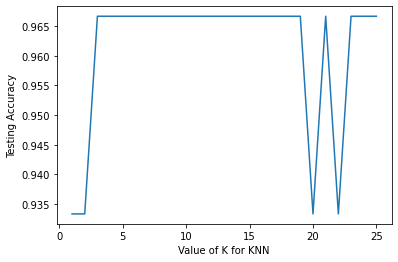

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between k dan testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)


KNeighborsClassifier()

In [ ]:
# 0=setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

#making prediction on some unseen data
#predict for the below two random observations
x_new =[[3,4,5,2],
        [5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


# Naive Bayes

P(C|X) = P(X|C) * P(C)

P(X|C) = $$ \frac{1}{\sqrt{2\Pi \sigma^{2}j }} e^{-\frac{(X_i-\mu)^{2}}{2\sigma^{2}j}} $$


In [ ]:
# Naive Bayes Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [ ]:
dataset_url = "https://raw.githubusercontent.com/ApoorvRusia/Naive-Bayes-classification-on-Iris-dataset/master/iris.csv"
dataset = pd.read_csv(dataset_url)

In [ ]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
%matplotlib inline
img=mpimg.imread('iris_types.jpg')
plt.figure(figsize=(20,40))
plt.axis('off')
plt.imshow(img)

In [ ]:
#Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:4].values
y = dataset['species'].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [ ]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
GaussianNB(priors=None)

GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


In [ ]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['virginica', 'virginica'],
       ['virginica', 'virginica'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa']], dtype=object)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


In [ ]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))     

Correct predictions:  28
False predictions 2


Accuracy of the Naive Bayes Clasification is:  0.9333333333333333


# K-Means Clustering Data Iris

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 

In [ ]:
data ="https://raw.githubusercontent.com/Nauvaldi/Dataset/main/Iris.csv"
df = pd.read_csv(data)
X = df.iloc[:, [0, 1, 2, 3]].values

In [ ]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

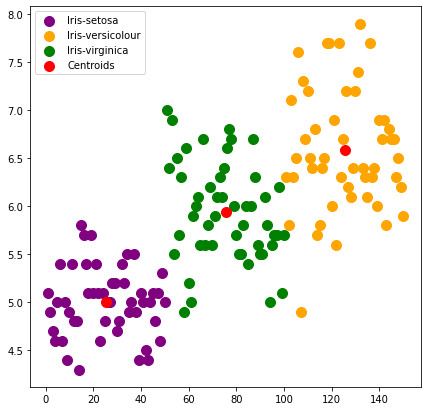

In [ ]:
#Visualising the clusters
plt.figure(figsize = (7,7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.show()

# Decision Tree dengan Gini Index 



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

In [2]:
#Filtering the warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset iris
iris = datasets.load_iris()

data=pd.DataFrame(iris['data'],columns=["Petal Length","Petal Width","Sepal Length","Sepal Width"])
data

In [9]:
data['Species']=iris['target']

data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

data.head()



,Petal Length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Preparing data for Model Building

In [11]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(data,test_size=0.3)

In [14]:
train_X=train[['Sepal Length',"Sepal Width","Petal Length","Petal Width"]]
train_y=train.Species

In [16]:
test_X=test[['Sepal Length',"Sepal Width","Petal Length","Petal Width"]]
test_y=test.Species

Import Decision Tree to build Classification Model

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
DT = DecisionTreeClassifier(criterion='gini',random_state=12)
model = DT.fit(train_X, train_y)

In [19]:
DT.predict(test_X)

array(['virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'setosa', 'virginica', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

Cek Akurasi Model

In [20]:
DT.score(test_X, test_y)

0.9777777777777777

In [21]:
#prediction
y_pred = DT.predict(test_X)

In [22]:
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(test_y, y_pred))

Accuracy Score: 0.9777777777777777


Visualisasi Decision tree

In [23]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
# Import necessary libraries for graph viz
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

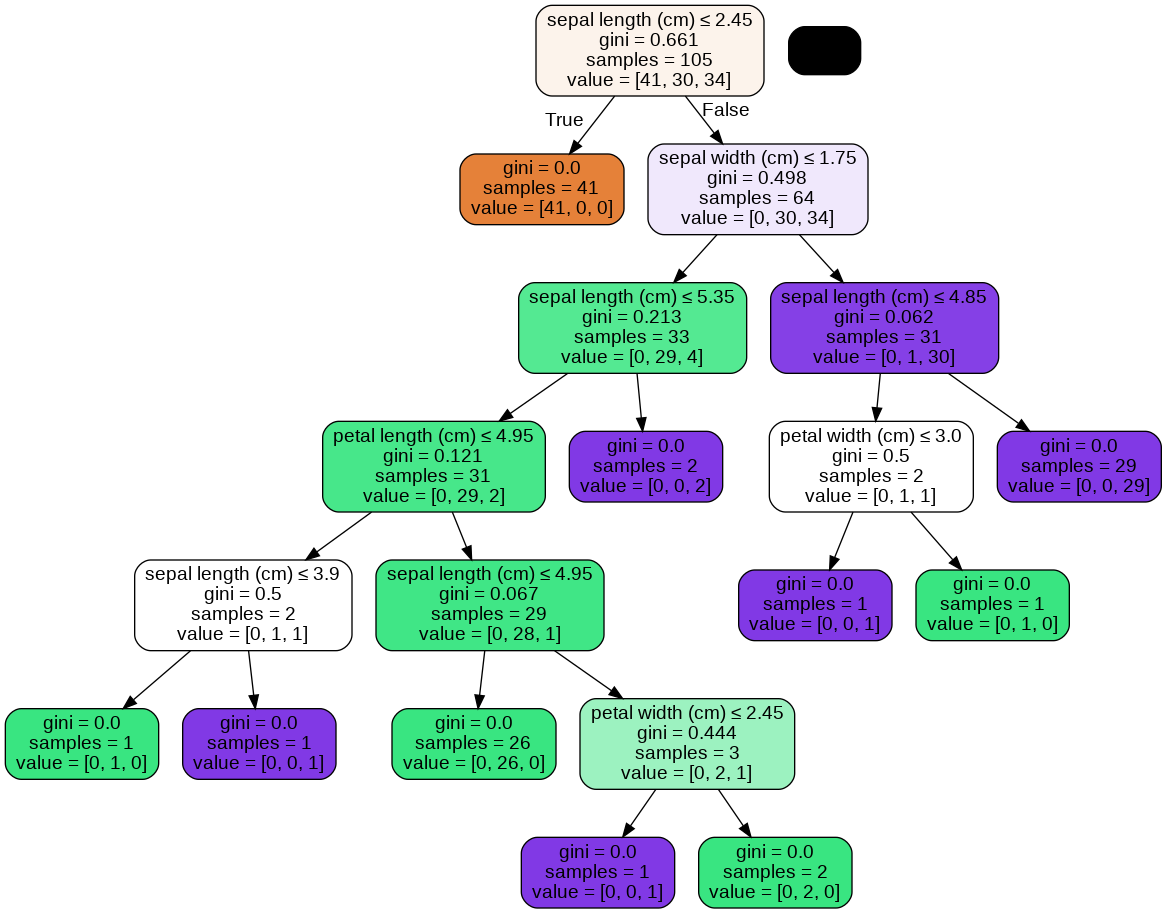

In [26]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [27]:
DT.predict([[3.5, 1.9, 5.2, 2.4]])

array(['virginica'], dtype=object)